In [2]:
import scipy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import scipy.signal as sig

- Definition of the Coherence Spectrum:  $$ G_{xy}\left(s\right) = \frac{|P_{xy}(s)|^2}{|P_{xx}(s)||P_{yy}(s)|}$$

- Calculating the cospectra using the convolution theorem: $$ P_{xy} = \mathcal{F}(C_{xy}) = \mathcal{F}(x*y) = \mathcal{F}(x)\mathcal{F}(y)$$

- Expression the complex fourier coeffeicient in polar form: $$ \mathcal{F}(x)(s) = X_r(s) + i X_i)(s) =  r_x(s) \exp{\left(j\theta_x(s)\right)} $$

- The cospectra in polar form: $$ P_{xy} =  r_xr_y \exp{\left(j\left[\theta_x+\theta_y\right]\right)}  $$
  - 1 spectra for $r_xr_y$, this is related to coherence 
  - 1 spectra for $\theta_x+\theta_y$, this is the phase

- Similar expressions for $P_{xx}, P_{yy}$: $$ P_{xx} =  r_x^2 \exp{\left(j2\theta_x\right)} $$

- What happens when we try to compute $G_{xy}$ naively? $$ G_{xy}\left(s\right) = \frac{\left(r_xr_y\right)^2}{r_x^2r_y^2}=1 $$
- What happens if we try to compute $G_{xy}$ with more degrees of freedom? Lets pretend that we take $n$ non-windowed, non-overlapping estimates of each of $X$ and $Y$
  - $$ \overline{P_{xy}}=\frac{1}{n}\sum_ir^i_xr^i_y \exp{\left(j\left[\theta^i_x+\theta^i_y\right]\right)}  $$
  - $$ \overline{P_{xx}}=\frac{1}{n}\sum_i{r^i_x}^2 $$
  - $$ \overline{P_{yy}}=\frac{1}{n}\sum_i{r^i_y}^2 $$

- Now our estimate of $G_{xy}$ will be like $$ G_{xy} = \frac{\sum_i\left({r^i_x}{r^i_y}\right)^2}{\sum_i{r^i_x}^2 \sum_i{r^i_y}^2} $$

- There is one special case, what happens if 


Text(0.5, 1.0, 'Tropical Precipitable Water')

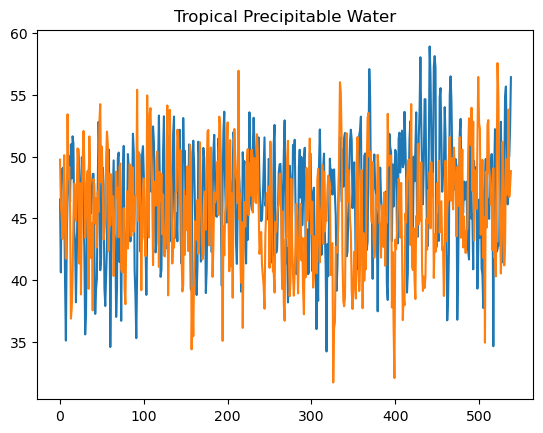

In [3]:
ds=xr.open_dataset('../data/pr_wtr.eatm.mon.mean.nc')

pr0=ds.isel(lat=36,lon=0).pr_wtr.data
pr1=ds.isel(lat=36,lon=30).pr_wtr.data

plt.plot(pr0)
plt.plot(pr1)

plt.title('Tropical Precipitable Water')


/home/rfajber/m3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


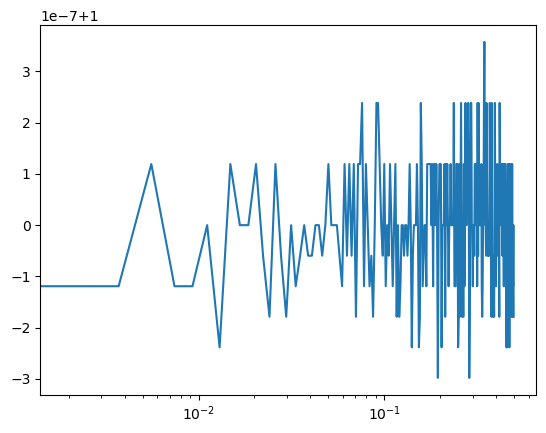

In [4]:
Xmf=fft.fft(pr0)
Ymf=fft.fft(pr1)

Pxx = np.conj(Xmf)*Xmf
Pyx = np.conj(Xmf)*Ymf
Pyy = np.conj(Ymf)*Ymf

cohere = np.abs(Pyx)**2/(Pxx*Pyy)
phase = np.arctan(np.imag(Pyx),np.real(Pyx))

f=fft.fftfreq(len(pr0))


plt.semilogx(fft.fftshift(f),fft.fftshift(
    cohere
    ))

#plt.ylim([0,1.1])
